In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm
sys.path.append("..")
from script.incremental_SAX import Incremental_SAX

# First studies of EEG signals 
In order to do some initial analysis of EEG signals we download the UCI [EEG Eye State Data Set](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#). 

+ Dataset obtained from a continuous EEG measurement.
+ EEG technology used: `Emotiv EEG Neuroheadset`. 
+ Duration: 117 seconds. 
+ Last column: Eye state detected using a camera and added manually. (1: eye-closed, 0: eye-opened)
+ Values in chronological order (from the top to the bottom of the dataset)
+ Since the dataset contains 14980 points, the frequency of measures is of 128 points per second, which is close to 10 times the [frequency of Beta wave](http://emedicine.medscape.com/article/1139332-overview#a2). 


In [2]:
def clean_outlier(column):
    mean_column = column.mean()
    std_column = column.std()
    column[column > mean_column+3*std_column] = mean_column+3*std_column
    column[column < mean_column-3*std_column] = mean_column-3*std_column
    return column

In [3]:
eeg = pd.read_csv("../data/EEG_Eye_State.arff",comment="@",header=None)
Y = eeg[eeg.columns[-1]]
X = eeg.drop(eeg.columns[-1],1)
X = X.apply(clean_outlier)

In [4]:
z_eeg = znormalization(X)
split_eeg = paa_transform(z_eeg, 1500)
sax_eeg = sax_transform(X, 1500, 30, True)

(-1, 1)

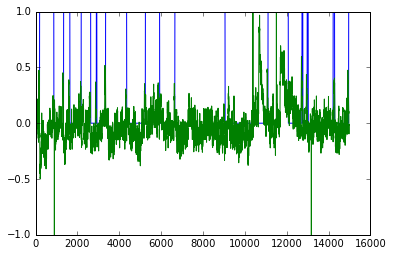

In [11]:
plt.plot(range(Y.size),Y)
plt.plot(range(Y.size),z_eeg[3])
plt.ylim([-1,1])

(-2.5, 2.5)

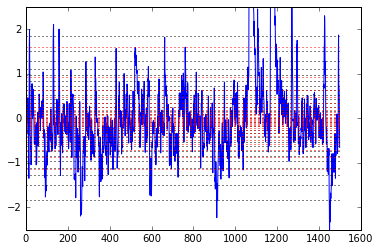

In [14]:
alphabet_sz=30
eeg_id = 2

percentils2 = np.percentile(split_eeg,np.linspace(1./alphabet_sz, 
                                          1-1./alphabet_sz, 
                                          alphabet_sz-1)*100)

percentils = norm.ppf(np.linspace(1./alphabet_sz, 
                                          1-1./alphabet_sz, 
                                          alphabet_sz-1))
plt.plot(range(split_eeg[:,eeg_id].size),split_eeg[:,eeg_id])
for percentil in percentils:
    plt.plot((0, split_eeg[:,eeg_id].size), (percentil, percentil), 'k:')
for percentil in percentils2:
    plt.plot((0, split_eeg[:,eeg_id].size), (percentil, percentil), 'r:')
plt.ylim([-2.5,2.5])

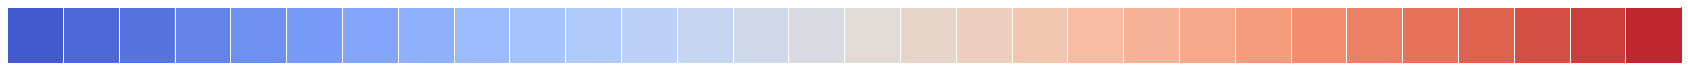

In [15]:
import seaborn as sns
#palette = sns.color_palette("hls", 30)
#sns.palplot(sns.color_palette("hls", 30))
palette = sns.color_palette("coolwarm", 30)
sns.palplot(sns.color_palette("coolwarm", 30))

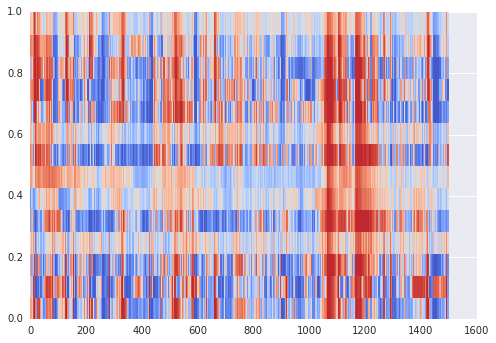

In [157]:
step = 1./sax_eeg.shape[1]
for k,eeg_id in enumerate(range(sax_eeg.shape[1])):
    for i,val in enumerate(sax_eeg[:,eeg_id]):
        plt.plot((i,i), (k*step,(k+1)*step), color=palette[val])

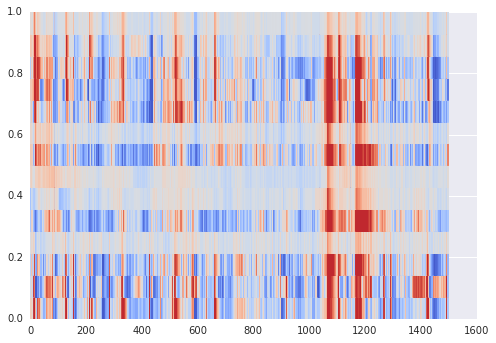

In [16]:
step = 1./sax_eeg.shape[1]
for k,eeg_id in enumerate(range(sax_eeg.shape[1])):
    for i,val in enumerate(sax_eeg[:,eeg_id]):
        plt.plot((i,i), (k*step,(k+1)*step), color=palette[val])

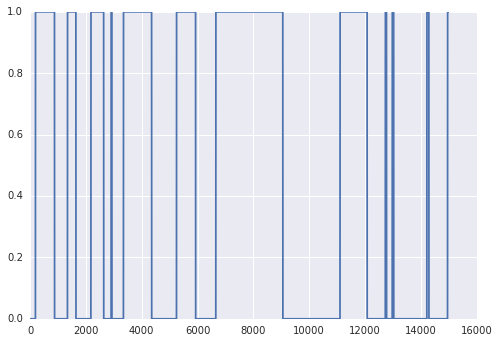

In [94]:
plt.plot(range(Y.size),Y)